<!-- Trabalho Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Fundamentos de Linguagem Python - Do Básico a Aplicações de IA</font>
# <font color='blue'>Lista 5 de Exercícios</font>

In [1]:
# Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#### Exercício 1: Análise de Distribuição de Receita Mensal

- Contexto: Uma loja online deseja entender a variabilidade das receitas mensais para ajustar seu fluxo de caixa.

- Tarefa: Carregue os dados simulados de receita mensal e apresente um relatório com média, mediana, desvio-padrão, assimetria e curtose. Visualize a distribuição e interprete se ela é simétrica, à direita ou à esquerda.

- Resultado esperado: Descreva a tendência central e a dispersão, comente se a média representa bem o conjunto.

In [2]:
# Seed
np.random.seed(10)

# Cria dados de receita
receita = np.random.normal(50000, 8000, 100)

# Cria o dataframe
df = pd.DataFrame({'Receita': receita})

# Visualiza os dados
df.head()

,Receita
0,60652.692033
1,55722.231795
2,37636.797663
3,49932.929201
4,54970.687791


In [3]:
# Solução
df.describe()

,Receita
count,100.000000
mean,50635.333303
std,7775.289947
min,32946.303132
25%,46128.766733
50%,50754.947314
75%,55377.709347
max,69741.208451


In [4]:
# Solução
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Receita,100.0,50635.333303,7775.289947,32946.303132,46128.766733,50754.947314,55377.709347,69741.208451


- Média é o valor obtido somando todos os dados e dividindo pela quantidade de elementos, representando o “centro” dos valores.

- Mediana é o valor central quando os dados são colocados em ordem, separando a metade menor da metade maior.

- Desvio-padrão mede o quanto os valores se afastam da média, quanto maior, mais dispersos estão os dados.
<!-- Trabalho Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
- Assimetria indica se os dados estão distribuídos de forma equilibrada em torno da média; se há cauda mais longa à direita ou à esquerda.

- Curtose mostra o quão “achatada” ou “pontuda” é a distribuição em comparação com a normal; valores altos indicam picos acentuados e caudas longas.

In [5]:
# Solução
print("Assimetria:", df['Receita'].skew())
print("Curtose:", df['Receita'].kurtosis())

Assimetria: 0.013849241213213624
Curtose: 0.1934768485703171


- A assimetria de 0.0138 está muito próxima de zero, indicando que a distribuição é praticamente simétrica, ou seja, os valores se distribuem de forma equilibrada em torno da média, sem cauda mais longa à direita ou à esquerda.


- A curtose de 0.1935 também está próxima de zero, sugerindo que a distribuição é mesocúrtica, semelhante à distribuição normal, nem muito pontuda (leptocúrtica), nem muito achatada (platicúrtica).

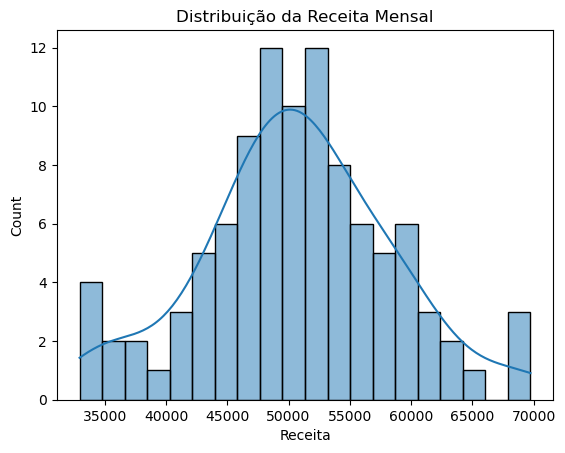

In [6]:
# Solução
sns.histplot(df['Receita'], bins = 20, kde = True)
plt.title('Distribuição da Receita Mensal')
plt.show()

#### Exercício 2: Desempenho por Segmento de Cliente

- Contexto: Uma empresa quer comparar o valor médio gasto por clientes novos e antigos.

- Tarefa: Para os dois grupos (clientes novos e antigos), calcule média, mediana e desvio-padrão, e compare visualmente com boxplot. Discuta se há sobreposição entre os grupos e qual apresenta maior variabilidade.
<!-- Trabalho Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
- Resultado esperado: Indique diferenças de média e dispersão, e o que isso sugere sobre o perfil de gasto.

In [7]:
# Seed
np.random.seed(5)

# Dataframe
clientes = pd.DataFrame({
    'Grupo': ['Novo'] * 80 + ['Antigo'] * 80,
    'Gasto': np.concatenate([np.random.normal(180, 40, 80),
                             np.random.normal(230, 35, 80)])
})

# Visualiza os dados
clientes.sample(10)

,Grupo,Gasto
122,Antigo,216.853270
119,Antigo,229.406914
143,Antigo,207.787163
40,Novo,167.765879
4,Novo,184.384394
27,Novo,165.467565
150,Antigo,279.075832
106,Antigo,200.373598
82,Antigo,256.100443
50,Novo,236.535921


In [8]:
# Solução
resumo = clientes.groupby('Grupo')['Gasto'].describe()
resumo

,count,mean,std,min,25%,50%,75%,max
Grupo,,,,,,,,
Antigo,80.0,232.921448,38.388523,148.253236,205.127578,231.443713,257.624944,318.228267
Novo,80.0,182.692648,38.652415,65.612481,162.151568,177.481971,206.822797,277.230847


- Os clientes antigos gastam, em média, mais (232,9) do que os novos (182,7), indicando um perfil de consumo mais elevado. O desvio-padrão é parecido entre os grupos (≈38), mostrando variabilidade semelhante nos gastos.
<!-- Trabalho Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

- No boxplot, deve haver pouca sobreposição, já que as faixas interquartis são diferentes. Isso sugere que, em geral, clientes antigos mantêm gastos consistentemente maiores, enquanto os novos ainda estão em fase de consumo menor, embora com dispersão parecida.

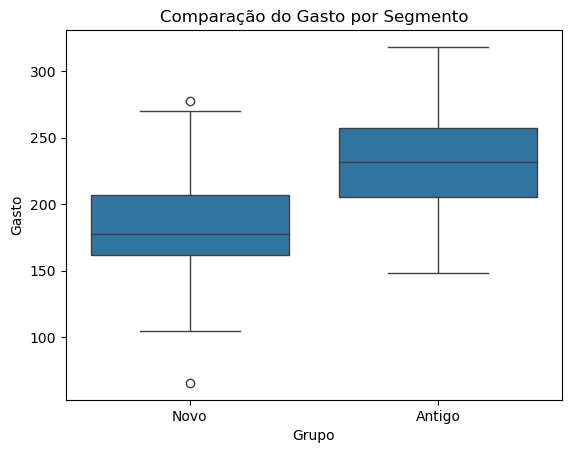

In [9]:
# Solução
sns.boxplot(data = clientes, x = 'Grupo', y = 'Gasto')
plt.title('Comparação do Gasto por Segmento')
plt.show()

Um boxplot típico mostra a distribuição dos dados de forma visual e resumida. Ele é composto por uma caixa (box) que representa o intervalo entre o primeiro quartil (Q1) e o terceiro quartil (Q3), ou seja, onde está concentrada metade dos valores.

Dentro da caixa há uma linha central, que indica a mediana, o valor central dos dados.

Os “bigodes” (whiskers) se estendem a partir da caixa até os valores mínimos e máximos dentro de um limite considerado normal.

Pontos que ficam fora desses limites são mostrados como outliers, representando valores atípicos.

Assim, o boxplot permite identificar rapidamente a tendência central, a dispersão e possíveis assimetrias ou outliers em um conjunto de dados.

<!-- Trabalho Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

#### Exercício 3: Correlação Entre Horas de Estudo e Nota

- Contexto: Um professor quer saber se o tempo de estudo está associado ao desempenho dos alunos.

- Tarefa: Calcule a correlação de Pearson e gere o gráfico de dispersão com linha de regressão. Interprete o grau e a direção da relação.

- Resultado esperado: Descreva se há correlação positiva, negativa ou nula e o que isso significa em termos práticos.

In [10]:
# Seed
np.random.seed(2)

# Dados
horas = np.random.uniform(1, 10, 50)
notas = 5*horas + np.random.normal(0, 5, 50)

# Dataframe
df = pd.DataFrame({'Horas': horas, 'Nota': notas})

# Visualiza os dados
df.head()

,Horas,Nota
0,4.923954,20.474094
1,1.233336,6.605232
2,5.946962,34.736641
3,4.917902,22.684045
4,4.783310,22.038204


In [11]:
# Solução
print(df.corr())

          Horas      Nota
Horas  1.000000  0.914853
Nota   0.914853  1.000000


- O valor 0.914853 representa uma correlação forte e positiva entre horas de estudo e nota. Isso significa que, quanto mais horas o aluno estuda, maior tende a ser sua nota. Como o valor está próximo de 1, a relação é quase linear e direta.

- Mas lembre-se: Correlação não implica causalidade!

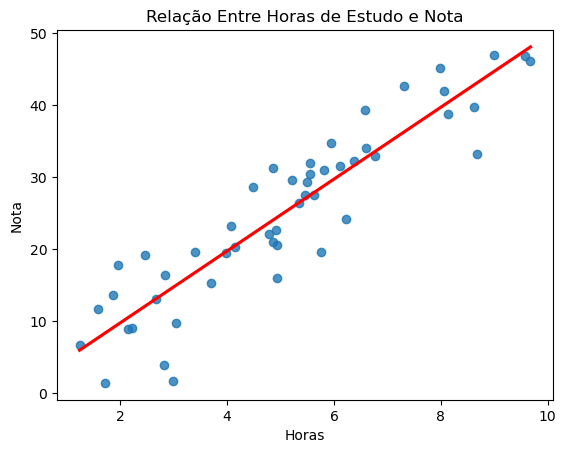

In [12]:
# Solução
sns.regplot(data = df, x = 'Horas', y = 'Nota', ci = None, line_kws = {'color':'red'})
plt.title('Relação Entre Horas de Estudo e Nota')
plt.show()

#### Exercício 4: Variação Semanal de Vendas

- Contexto: O gestor deseja entender como as vendas variam ao longo da semana.

- Tarefa: Simule dados de vendas diárias, calcule média e desvio por dia da semana e gere um gráfico de barras. Interprete os dias de maior e menor performance.

- Resultado esperado: Identifique os dias mais fortes e mais fracos, e comente sobre a estabilidade semanal das vendas.

In [13]:
# Seed
np.random.seed(3)

# Dados
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
vendas = pd.DataFrame({
    'Dia': np.random.choice(dias, 200),
    'Vendas': np.random.normal(1000, 150, 200)
})

vendas.head()

,Dia,Vendas
0,Qua,911.338189
1,Seg,922.537395
2,Ter,856.000573
3,Qui,1056.594285
4,Seg,913.793737


In [14]:
# Solução
resumo = vendas.groupby('Dia')['Vendas'].agg(['mean','std']).sort_values('mean', ascending = False)
resumo

,mean,std
Dia,,
Sex,1049.790137,152.085006
Dom,1034.716174,161.899699
Qui,1027.466786,196.069107
Sab,1021.630030,133.611346
Qua,1009.722472,134.496526
Seg,1008.344683,121.895506
Ter,990.271715,142.264723


- As maiores médias de vendas ocorrem na sexta (1049,8) e no domingo (1034,7), indicando picos próximos ao fim de semana. Já a terça-feira (990,3) tem o menor desempenho.

- O desvio-padrão é moderado, sugerindo variação regular entre os dias, mas um leve aumento de instabilidade nas quintas.

- Em resumo, as vendas se mantêm estáveis ao longo da semana, com melhor performance nos dias próximos ao fim de semana.

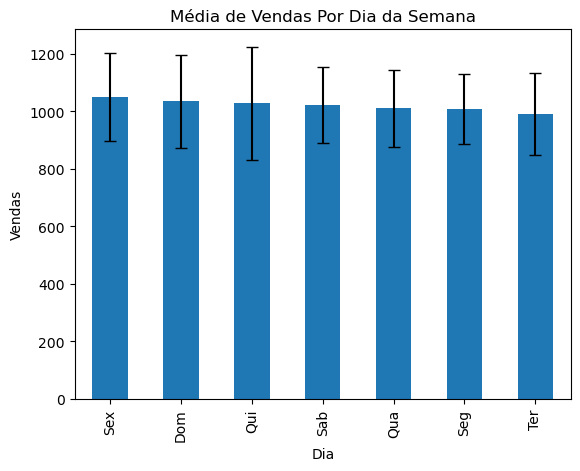

In [15]:
# Solução
resumo['mean'].plot(kind = 'bar', yerr = resumo['std'], capsize = 4)
plt.title('Média de Vendas Por Dia da Semana')
plt.ylabel('Vendas')
plt.show()

#### Exercício 5: Estimativa da Média com Intervalo de Confiança (Statsmodels)

- Contexto: Um analista de RH quer estimar a altura média dos colaboradores com 95% de confiança.

- Tarefa: Calcule a média e o intervalo de confiança usando o DescrStatsW do Statsmodels. Interprete o resultado como se fosse parte de um relatório técnico.

- Resultado esperado: Apresente a altura média estimada e explique o significado do intervalo de confiança no contexto da amostra.

In [16]:
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW

np.random.seed(7)
alturas = np.random.normal(1.75, 0.08, 40)

In [17]:
# Solução
desc = DescrStatsW(alturas)
print("Média Estimada:", round(desc.mean, 3))
print("Intervalo de Confiança (95%):", desc.tconfint_mean())

Média Estimada: 1.742
Intervalo de Confiança (95%): (np.float64(1.7143126677074145), np.float64(1.769649181020626))


- A média estimada é 1,742, e o intervalo de confiança de 95% indica que há alta probabilidade de a média real da população estar entre 1,714 e 1,770. Isso mostra uma estimativa precisa, com variação pequena em torno da média.

# Fim